# Data Loading

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import math

In [2]:
import os
os.chdir('/Users/platong/Downloads')

In [3]:
oxford_data = pd.read_csv('oxford.csv')
marlow_data = pd.read_csv('marlow.csv')
chichester_data = pd.read_csv('chichester.csv')
winchester_data = pd.read_csv('winchester.csv')
guilford_data = pd.read_csv('guilford.csv')
henley_data = pd.read_csv('henley.csv')
brighton_data = pd.read_csv('brighton.csv')
reading_data = pd.read_csv('reading.csv')
southampton_data = pd.read_csv('southampton.csv')
canterbury_data = pd.read_csv('canterbury.csv')

In [4]:
housing_data_full = pd.concat([oxford_data,marlow_data,chichester_data,winchester_data,guilford_data,henley_data,brighton_data,reading_data,southampton_data,canterbury_data
])

In [5]:
housing_data_full

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,price,no_bed,no_bath,no_rec,size,type,address,EPC,Unnamed: 12,Unnamed: 13
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/property-detail/gbs...,"£1,500,000",4Bedrooms,4Bathrooms,3Receptions,"3,162 sq ft (293.76 sq m)",House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",EPC Rating: D,NaN,NaN
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/property-detail/gbs...,"£1,600,000",5Bedrooms,3Bathrooms,2Receptions,"2,050 sq ft (190.45 sq m)",House,"Oxford, Oxfordshire, OX2 7QB",EPC Rating: C,NaN,NaN
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/property-detail/gbs...,"£1,050,000",5Bedrooms,2Bathrooms,4Receptions,"2,031 sq ft (188.69 sq m)",House,"Oxford, Oxfordshire, OX2 8HX",EPC Rating: E,NaN,NaN
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/property-detail/gbs...,"£900,000",5Bedrooms,2Bathrooms,2Receptions,"2,124 sq ft (197.33 sq m)",House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",EPC Rating: D,NaN,NaN
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/property-detail/gbs...,"£1,300,000",5Bedrooms,4Bathrooms,2Receptions,"3,110 sq ft (288.93 sq m)",House,"Oxford, Oxfordshire, OX33 1AY",EPC Rating: D,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1710857925-3,https://search.savills.com/com/en/list?SearchL...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/com/en/property-det...,"£1,200,000",5Bedrooms,3Bathrooms,2Receptions,"302.21 sq m (3,253 sq ft)",House,"Hastingleigh, Ashford, Kent, TN25 5JE",EPC Rating: D,NaN,NaN
1,1710857928-4,https://search.savills.com/com/en/list?SearchL...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/com/en/property-det...,"£850,000",4Bedrooms,2Bathrooms,3Receptions,"144.93 sq m (1,560 sq ft)",House,"Elham, Canterbury, Kent, CT4 6TE",EPC Rating: F,NaN,NaN
2,1710857931-5,https://search.savills.com/com/en/list?SearchL...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/com/en/property-det...,"£1,000,000",4Bedrooms,2Bathrooms,3Receptions,"238.85 sq m (2,571 sq ft)",House,"Staple, Canterbury, Kent, CT3 1NX",EPC Rating: C,NaN,NaN
3,1710857933-6,https://search.savills.com/com/en/list?SearchL...,loadingloadingloadingloadingloadingloadingload...,https://search.savills.com/com/en/property-det...,"£750,000",4Bedrooms,2Bathrooms,2Receptions,"217.67 sq m (2,343 sq ft)",House,"Wingham, Canterbury, Kent, CT3 1BJ",EPC Rating: E,NaN,NaN


# Data Cleaning & Transformming

In [6]:
housing_data_full['price'] = housing_data_full['price'].str.replace('£','')
housing_data_full['price'] = housing_data_full['price'].str.replace(',','')
housing_data_full['price'] = housing_data_full['price'].apply(pd.to_numeric)

housing_data_full['no_bed'] = housing_data_full['no_bed'].str.replace('Bedrooms','')
housing_data_full['no_bed'] = housing_data_full['no_bed'].apply(pd.to_numeric)

housing_data_full['no_bath'] = housing_data_full['no_bath'].str.replace('Bathrooms','')
housing_data_full['no_bath'] = housing_data_full['no_bath'].apply(pd.to_numeric)

housing_data_full['no_rec'] = housing_data_full['no_rec'].str.replace('Receptions','')
housing_data_full['no_rec'] = housing_data_full['no_rec'].apply(pd.to_numeric)

housing_data_full['sqft'] = housing_data_full['size'].str.extract(r'([\d,]+) sq ft')
housing_data_full['sqft'] = housing_data_full['sqft'].str.replace(',','')
housing_data_full['sqft'] = housing_data_full['sqft'].apply(pd.to_numeric)
housing_data_full.drop(columns=['size'], inplace=True)

housing_data_full.drop(columns=['Unnamed: 12'], inplace=True)
housing_data_full.drop(columns=['Unnamed: 13'], inplace=True)
housing_data_full.drop(columns=['listing_link'], inplace=True)


housing_data_full['EPC'] = housing_data_full['EPC'].str.replace('EPC Rating:', '').str.extract(r'(\b\w+\b)').astype(str)

In [7]:
housing_data_full

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,type,address,EPC,sqft
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,3162
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,2050
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,2031
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,2124
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,3110
...,...,...,...,...,...,...,...,...,...,...,...
0,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,3253
1,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,1560
2,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,2571
3,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,2343


## Adding new columns

### Price per sq ft (£/sq ft)

In [8]:
housing_data_full['price_sqft'] = housing_data_full['price'] / housing_data_full['sqft']
housing_data_full['price_sqft'] = housing_data_full['price_sqft'].astype(float)
#Round up the values in 'price_sqft' column to the nearest integer:
housing_data_full['price_sqft'] = housing_data_full['price_sqft'].apply(lambda x: math.ceil(x)) 
housing_data_full['price_sqft'] = housing_data_full['price_sqft'].astype(str) + ' £/sqft'

In [9]:
housing_data_full.rename(columns={'type': 'property_type'}, inplace=True)

In [10]:
housing_data_full

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,sqft,price_sqft
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,3162,475 £/sqft
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,2050,781 £/sqft
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,2031,517 £/sqft
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,2124,424 £/sqft
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,3110,419 £/sqft
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,3253,369 £/sqft
1,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,1560,545 £/sqft
2,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,2571,389 £/sqft
3,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,2343,321 £/sqft


### City

In [11]:
city_data = pd.read_csv('city.csv')
housing_data_full = pd.read_csv('housing_data_full.csv')
housing_data_full['city'] = city_data['City']
housing_data_full.rename(columns={'city': 'City'}, inplace=True)

In [12]:
housing_data_full

,Unnamed: 0,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,sqft,price_sqft,City
0,0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,3162,475 £/sqft,Oxford
1,1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,2050,781 £/sqft,Oxford
2,2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,2031,517 £/sqft,Oxford
3,3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,2124,424 £/sqft,Oxford
4,4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,3110,419 £/sqft,Oxford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,3253,369 £/sqft,Canterbury
110,110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,1560,545 £/sqft,Canterbury
111,111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,2571,389 £/sqft,Canterbury
112,112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,2343,321 £/sqft,Canterbury


In [13]:
housing_data_full.to_excel("housing_data_full.xlsx")

### Population & Median values

In [14]:
city_stats_dict = [
    {'City': 'Oxford', 'City_population': 182100, 'City_med_income': 38800, 'City_med_age': 30},
    {'City': 'Henley', 'City_population': 11782, 'City_med_income': 36500, 'City_med_age': 31.1},
    {'City': 'Marlow', 'City_population': 14644, 'City_med_income': 43500, 'City_med_age': 42.0},
    {'City': 'Southampton', 'City_population': 286561, 'City_med_income': 37000, 'City_med_age': 34},
    {'City': 'Winchester', 'City_population': 127500, 'City_med_income': 31276, 'City_med_age': 42},
    {'City': 'Chichester', 'City_population': 124100, 'City_med_income': 31800, 'City_med_age': 47},
    {'City': 'Brighton', 'City_population': 276300, 'City_med_income': 34900, 'City_med_age': 36.5},
    {'City': 'Canterbury', 'City_population': 157400, 'City_med_income': 32900, 'City_med_age': 40},
    {'City': 'Reading', 'City_population': 174224, 'City_med_income': 40600, 'City_med_age': 34},
    {'City': 'Guildford', 'City_population': 143649, 'City_med_income': 43300, 'City_med_age': 38.5}
]

city_stats = pd.DataFrame(city_stats_dict)

In [15]:
city_stats

,City,City_population,City_med_income,City_med_age
0,Oxford,182100,38800,30.0
1,Henley,11782,36500,31.1
2,Marlow,14644,43500,42.0
3,Southampton,286561,37000,34.0
4,Winchester,127500,31276,42.0
5,Chichester,124100,31800,47.0
6,Brighton,276300,34900,36.5
7,Canterbury,157400,32900,40.0
8,Reading,174224,40600,34.0
9,Guildford,143649,43300,38.5


In [16]:
city_stats.dtypes

City                object
City_population      int64
City_med_income      int64
City_med_age       float64
dtype: object

In [17]:
housing_data_full['City'].dtypes == city_stats['City'].dtypes
housing_data_full['City'] = housing_data_full['City'].astype(str)
housing_data_full['City'] = housing_data_full['City'].str.strip()
updated_housing_data = pd.merge(housing_data_full, city_stats, on='City', how='left')
updated_housing_data

,Unnamed: 0,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,sqft,price_sqft,City,City_population,City_med_income,City_med_age
0,0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,3162,475 £/sqft,Oxford,182100,38800,30.0
1,1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,2050,781 £/sqft,Oxford,182100,38800,30.0
2,2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,2031,517 £/sqft,Oxford,182100,38800,30.0
3,3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,2124,424 £/sqft,Oxford,182100,38800,30.0
4,4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,3110,419 £/sqft,Oxford,182100,38800,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,3253,369 £/sqft,Canterbury,157400,32900,40.0
110,110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,1560,545 £/sqft,Canterbury,157400,32900,40.0
111,111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,2571,389 £/sqft,Canterbury,157400,32900,40.0
112,112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,2343,321 £/sqft,Canterbury,157400,32900,40.0


### Postcode (extract from address)

In [18]:
updated_housing_data['postcode'] = updated_housing_data['address'].str.split(',').str[-1].str.strip()

In [19]:
updated_housing_data.drop(columns=['Unnamed: 0'], inplace=True)
updated_housing_data

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,sqft,price_sqft,City,City_population,City_med_income,City_med_age,postcode
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,3162,475 £/sqft,Oxford,182100,38800,30.0,OX44 7JG
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,2050,781 £/sqft,Oxford,182100,38800,30.0,OX2 7QB
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,2031,517 £/sqft,Oxford,182100,38800,30.0,OX2 8HX
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,2124,424 £/sqft,Oxford,182100,38800,30.0,OX44 9DJ
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,3110,419 £/sqft,Oxford,182100,38800,30.0,OX33 1AY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,3253,369 £/sqft,Canterbury,157400,32900,40.0,TN25 5JE
110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,1560,545 £/sqft,Canterbury,157400,32900,40.0,CT4 6TE
111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,2571,389 £/sqft,Canterbury,157400,32900,40.0,CT3 1NX
112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,2343,321 £/sqft,Canterbury,157400,32900,40.0,CT3 1BJ


### Distance to city centre

#### There are tons of ways to find out the distances between two sets of coordinates globally on the internet, here I used [freemaptools.com](https://www.freemaptools.com/)  
#### which allowed me to easily use a point-and-click interface to gather the coordinates data (lon,lat) for each postal codes. 
#### The outputs from the website allow me to copy and paste directly to the updated_housing_data spreadsheet then work on the calculation.

##### Coordinates of the property:

In [20]:
coordinates = [
    (51.71151, -1.07196),
    (51.78252, -1.26003),
    (51.78994, -1.27929),
    (51.71269, -1.15480),
    (51.80730, -1.13764),
    (51.76974, -1.22622),
    (51.76662, -1.25754),
    (51.76831, -1.27168),
    (51.63553, -1.39563),
    (51.78558, -1.27520),
    (51.74838, -1.22283),
    (51.75642, -1.26451),
    (51.74171, -1.28752),
    (51.78463, -1.27756),
    (51.56716, -0.78719),
    (51.55879, -0.86977),
    (51.56875, -0.78847),
    (51.58346, -0.82599),
    (51.58244, -0.76709),
    (51.52882, -0.70659),
    (51.56927, -0.76652),
    (51.57281, -0.69396),
    (51.56539, -0.73836),
    (51.53005, -0.70276),
    (51.57765, -0.75075),
    (51.57617, -0.77532),
    (51.52950, -0.75988),
    (51.61105, -0.83739),
    (51.56220, -0.74389),
    (50.94869, -0.62322),
    (50.94869, -0.62322),
    (50.82192, -0.61738),
    (50.99819, -0.73518),
    (50.95422, -0.68050),
    (50.95418, -0.75092),
    (50.98104, -0.61295),
    (51.01812, -0.74800),
    (50.82535, -0.85622),
    (50.98275, -0.60902),
    (50.95665, -0.78202),
    (51.25943, -1.62348),
    (50.90603, -1.21082),
    (51.06556, -1.33765),
    (51.01079, -1.65624),
    (51.11049, -0.98238),
    (51.16559, -1.23514),
    (51.06942, -1.33480),
    (51.27202, -1.51654),
    (51.03072, -1.64887),
    (51.05706, -1.32185),
    (51.00180, -1.40909),
    (51.11075, -1.29982),
    (51.24381, -0.53249),
    (51.23288, -0.58370),
    (51.19306, -0.65091),
    (51.27159, -0.37195),
    (51.23640, -0.56593),
    (51.24224, -0.54997),
    (51.22991, -0.56403),
    (51.34603, -0.45645),
    (51.14483, -0.63497),
    (51.13295, -0.63172),
    (51.25848, -0.45324),
    (51.13561, -0.62027),
    (51.24194, -0.54933),
    (51.34576, -0.45894),
    (51.54177, -0.66670),
    (51.52618, -0.93293),
    (51.53584, -0.90221),
    (51.61105, -0.83739),
    (51.50139, -0.86667),
    (51.52450, -0.98731),
    (51.53222, -0.99527),
    (51.59996, -0.66560),
    (51.53548, -0.90098),
    (51.57281, -0.69396),
    (51.51950, -0.69573),
    (50.93655, -0.25016),
    (50.91509, -0.23628),
    (50.81598, -0.10039),
    (50.93256, -0.16267),
    (50.88881, 0.02145),
    (50.93505, -0.07640),
    (50.92568, -0.01252),
    (50.91251, -0.06121),
    (50.92724, -0.05811),
    (50.89586, -0.20612),
    (50.92117, 0.02603),
    (51.52371, -0.98104),
    (51.47982, -0.92322),
    (51.43336, -0.97608),
    (51.51112, -1.02260),
    (51.50288, -0.92367),
    (51.51032, -1.02392),
    (51.50099, -0.89941),
    (51.46028, -0.85788),
    (51.50081, -0.92537),
    (51.52450, -0.98731),
    (51.01538, -1.33316),
    (50.85778, -1.31347),
    (51.02289, -1.33589),
    (51.00772, -1.26923),
    (51.02074, -1.34366),
    (51.01724, -1.33499),
    (50.99727, -1.37479),
    (50.89224, -1.31439),
    (51.00953, -1.40749),
    (50.90603, -1.21082),
    (50.92126, -1.23899),
    (51.17974, 0.98949),
    (51.15305, 1.11054),
    (51.26407, 1.26608),
    (51.27362, 1.21476),
    (51.36445, 1.03738)
]
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

updated_housing_data['prop_lat'] = latitudes
updated_housing_data['prop_lon'] = longitudes

In [21]:
centre_coor_dict = [
    {
    'City': 'Oxford',
    'Centre_lat': 51.7536512,
    'Centre_lon': -1.2761259
},
{
    'City': 'Marlow',
    'Centre_lat': 51.5724424,
    'Centre_lon': -0.7979936
},
{
    'City': 'Chichester',
    'Centre_lat': 50.8360691,
    'Centre_lon': -0.8199946
},
{
    'City': 'Winchester',
    'Centre_lat': 51.0534603,
    'Centre_lon': -1.3410619
},
{
    'City': 'Guildford',
    'Centre_lat': 51.2415081,
    'Centre_lon': -0.6067087
},
{
    'City': 'Henley',
    'Centre_lat': 51.536223,
    'Centre_lon': -0.903912
},
{
    'City': 'Brighton',
    'Centre_lat': 50.825584,
    'Centre_lon': -0.1594777
},
{
    'City': 'Reading',
    'Centre_lat': 51.455654,
    'Centre_lon': -0.973449
},
{
    'City': 'Southampton',
    'Centre_lat': 50.903268,
    'Centre_lon': -1.404810
},
{
    'City': 'Canterbury',
    'Centre_lat': 51.2796426,
    'Centre_lon': 1.0697729
}
]

city_centre_coor = pd.DataFrame(centre_coor_dict)

In [22]:
city_centre_coor

,City,Centre_lat,Centre_lon
0,Oxford,51.753651,-1.276126
1,Marlow,51.572442,-0.797994
2,Chichester,50.836069,-0.819995
3,Winchester,51.053460,-1.341062
4,Guildford,51.241508,-0.606709
5,Henley,51.536223,-0.903912
6,Brighton,50.825584,-0.159478
7,Reading,51.455654,-0.973449
8,Southampton,50.903268,-1.404810
9,Canterbury,51.279643,1.069773


In [23]:
updated_housing_data['City'].dtypes == city_centre_coor['City'].dtypes
updated_housing_data['City'] = updated_housing_data['City'].astype(str)
updated_housing_data['City'] = updated_housing_data['City'].str.strip()
updated_housing_data1 = pd.merge(updated_housing_data, city_centre_coor, on='City', how='left')
updated_housing_data1

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,...,price_sqft,City,City_population,City_med_income,City_med_age,postcode,prop_lat,prop_lon,Centre_lat,Centre_lon
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,...,475 £/sqft,Oxford,182100,38800,30.0,OX44 7JG,51.71151,-1.07196,51.753651,-1.276126
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,...,781 £/sqft,Oxford,182100,38800,30.0,OX2 7QB,51.78252,-1.26003,51.753651,-1.276126
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,...,517 £/sqft,Oxford,182100,38800,30.0,OX2 8HX,51.78994,-1.27929,51.753651,-1.276126
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,...,424 £/sqft,Oxford,182100,38800,30.0,OX44 9DJ,51.71269,-1.15480,51.753651,-1.276126
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,...,419 £/sqft,Oxford,182100,38800,30.0,OX33 1AY,51.80730,-1.13764,51.753651,-1.276126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,...,369 £/sqft,Canterbury,157400,32900,40.0,TN25 5JE,51.17974,0.98949,51.279643,1.069773
110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,...,545 £/sqft,Canterbury,157400,32900,40.0,CT4 6TE,51.15305,1.11054,51.279643,1.069773
111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,...,389 £/sqft,Canterbury,157400,32900,40.0,CT3 1NX,51.26407,1.26608,51.279643,1.069773
112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,...,321 £/sqft,Canterbury,157400,32900,40.0,CT3 1BJ,51.27362,1.21476,51.279643,1.069773


In [24]:
import math
import geopy
from geopy import distance

In [25]:
updated_housing_data1['dis_to_cen(miles)'] = updated_housing_data1.apply(lambda row: geopy.distance.distance((row['prop_lat'], row['prop_lon']), (row['Centre_lat'], row['Centre_lon'])).miles, axis=1)

In [26]:
updated_housing_data1

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,...,City,City_population,City_med_income,City_med_age,postcode,prop_lat,prop_lon,Centre_lat,Centre_lon,dis_to_cen(miles)
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,...,Oxford,182100,38800,30.0,OX44 7JG,51.71151,-1.07196,51.753651,-1.276126,9.236050
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,...,Oxford,182100,38800,30.0,OX2 7QB,51.78252,-1.26003,51.753651,-1.276126,2.111908
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,...,Oxford,182100,38800,30.0,OX2 8HX,51.78994,-1.27929,51.753651,-1.276126,2.512517
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,...,Oxford,182100,38800,30.0,OX44 9DJ,51.71269,-1.15480,51.753651,-1.276126,5.928349
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,...,Oxford,182100,38800,30.0,OX33 1AY,51.80730,-1.13764,51.753651,-1.276126,7.001786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,...,Canterbury,157400,32900,40.0,TN25 5JE,51.17974,0.98949,51.279643,1.069773,7.735459
110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,...,Canterbury,157400,32900,40.0,CT4 6TE,51.15305,1.11054,51.279643,1.069773,8.928415
111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,...,Canterbury,157400,32900,40.0,CT3 1NX,51.26407,1.26608,51.279643,1.069773,8.580346
112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,...,Canterbury,157400,32900,40.0,CT3 1BJ,51.27362,1.21476,51.279643,1.069773,6.300256


### Final Data Validation

In [27]:
updated_housing_data1 = updated_housing_data1.astype({'price':'float'})
updated_housing_data1 = updated_housing_data1.astype({'property_type':'str'})
updated_housing_data1 = updated_housing_data1.astype({'address':'str'})
updated_housing_data1 = updated_housing_data1.astype({'EPC':'str'})
updated_housing_data1 = updated_housing_data1.astype({'sqft':'float'})
updated_housing_data1 = updated_housing_data1.astype({'price_sqft':'str'})
updated_housing_data1 = updated_housing_data1.astype({'City':'str'})
updated_housing_data1 = updated_housing_data1.astype({'property_type':'str'})

In [28]:
final_housing_data = updated_housing_data1.copy()

In [29]:
final_housing_data.dtypes

web-scraper-order         object
web-scraper-start-url     object
listing_link-href         object
price                    float64
no_bed                     int64
no_bath                    int64
no_rec                     int64
property_type             object
address                   object
EPC                       object
sqft                     float64
price_sqft                object
City                      object
City_population            int64
City_med_income            int64
City_med_age             float64
postcode                  object
prop_lat                 float64
prop_lon                 float64
Centre_lat               float64
Centre_lon               float64
dis_to_cen(miles)        float64
dtype: object

In [30]:
final_housing_data.to_excel("final_housing_data.xlsx")

### Drop Duplicates if have any

In [31]:
final_housing_data.drop_duplicates().shape

(114, 22)

In [32]:
final_housing_data

,web-scraper-order,web-scraper-start-url,listing_link-href,price,no_bed,no_bath,no_rec,property_type,address,EPC,...,City,City_population,City_med_income,City_med_age,postcode,prop_lat,prop_lon,Centre_lat,Centre_lon,dis_to_cen(miles)
0,1710807522-1,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1500000.0,4,4,3,House,"Great Haseley, Oxford, Oxfordshire, OX44 7JG",D,...,Oxford,182100,38800,30.0,OX44 7JG,51.71151,-1.07196,51.753651,-1.276126,9.236050
1,1710807524-2,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1600000.0,5,3,2,House,"Oxford, Oxfordshire, OX2 7QB",C,...,Oxford,182100,38800,30.0,OX2 7QB,51.78252,-1.26003,51.753651,-1.276126,2.111908
2,1710807526-3,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1050000.0,5,2,4,House,"Oxford, Oxfordshire, OX2 8HX",E,...,Oxford,182100,38800,30.0,OX2 8HX,51.78994,-1.27929,51.753651,-1.276126,2.512517
3,1710807528-4,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,900000.0,5,2,2,House,"Garsington, Oxford, Oxfordshire, OX44 9DJ",D,...,Oxford,182100,38800,30.0,OX44 9DJ,51.71269,-1.15480,51.753651,-1.276126,5.928349
4,1710807530-5,https://search.savills.com/list?SearchList=Id_...,https://search.savills.com/property-detail/gbs...,1300000.0,5,4,2,House,"Oxford, Oxfordshire, OX33 1AY",D,...,Oxford,182100,38800,30.0,OX33 1AY,51.80730,-1.13764,51.753651,-1.276126,7.001786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1710857925-3,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1200000.0,5,3,2,House,"Hastingleigh, Ashford, Kent, TN25 5JE",D,...,Canterbury,157400,32900,40.0,TN25 5JE,51.17974,0.98949,51.279643,1.069773,7.735459
110,1710857928-4,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,850000.0,4,2,3,House,"Elham, Canterbury, Kent, CT4 6TE",F,...,Canterbury,157400,32900,40.0,CT4 6TE,51.15305,1.11054,51.279643,1.069773,8.928415
111,1710857931-5,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,1000000.0,4,2,3,House,"Staple, Canterbury, Kent, CT3 1NX",C,...,Canterbury,157400,32900,40.0,CT3 1NX,51.26407,1.26608,51.279643,1.069773,8.580346
112,1710857933-6,https://search.savills.com/com/en/list?SearchL...,https://search.savills.com/com/en/property-det...,750000.0,4,2,2,House,"Wingham, Canterbury, Kent, CT3 1BJ",E,...,Canterbury,157400,32900,40.0,CT3 1BJ,51.27362,1.21476,51.279643,1.069773,6.300256


### Data Visualisation

In [33]:
# !pip install hvplot
import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
from scipy.stats import norm
from scipy import stats
%matplotlib inline

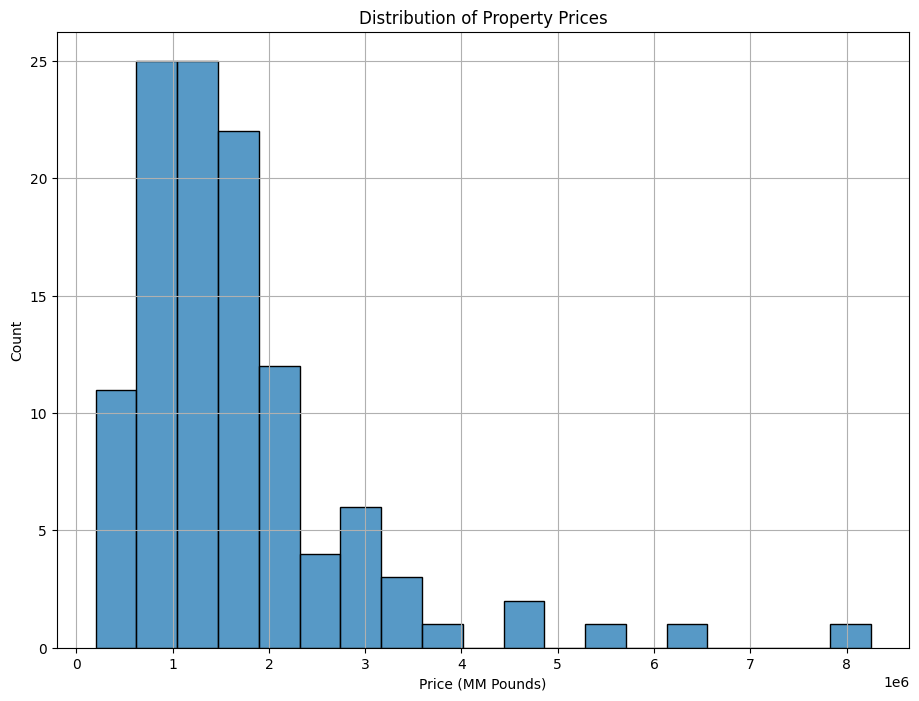

In [34]:
fig, ax = plt.subplots(figsize = ( 11 , 8 ))
sns.histplot(final_housing_data['price'])
ax.set_xlabel('Price (MM Pounds)')
plt.ylabel("Count")
plt.title('Distribution of Property Prices')
plt.grid()
plt.show()

In [35]:
final_housing_data['price'].describe()

count    1.140000e+02
mean     1.656446e+06
std      1.207453e+06
min      2.000000e+05
25%      9.125000e+05
50%      1.337500e+06
75%      1.990000e+06
max      8.250000e+06
Name: price, dtype: float64

/var/folders/86/jy_sl6ds7qs5g0c8z5lq2v1h0000gn/T/ipykernel_73432/764487133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_housing_data['price'], fit=norm)


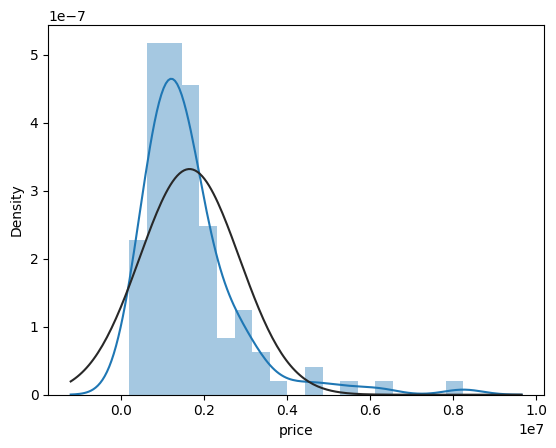

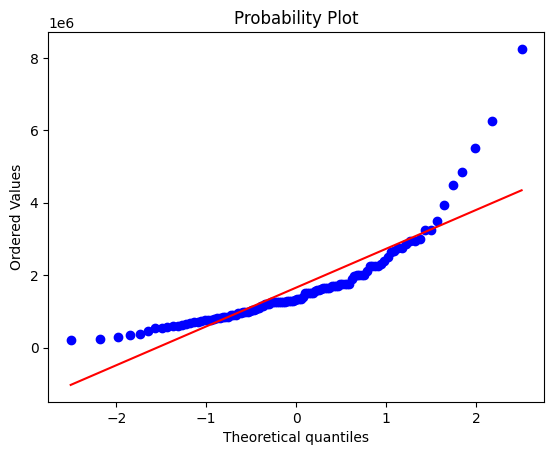

In [36]:
#histogram and normal probability plot
sns.distplot(final_housing_data['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(final_housing_data['price'], plot=plt)

Text(0.5, 1.0, 'Distribution of House Price')

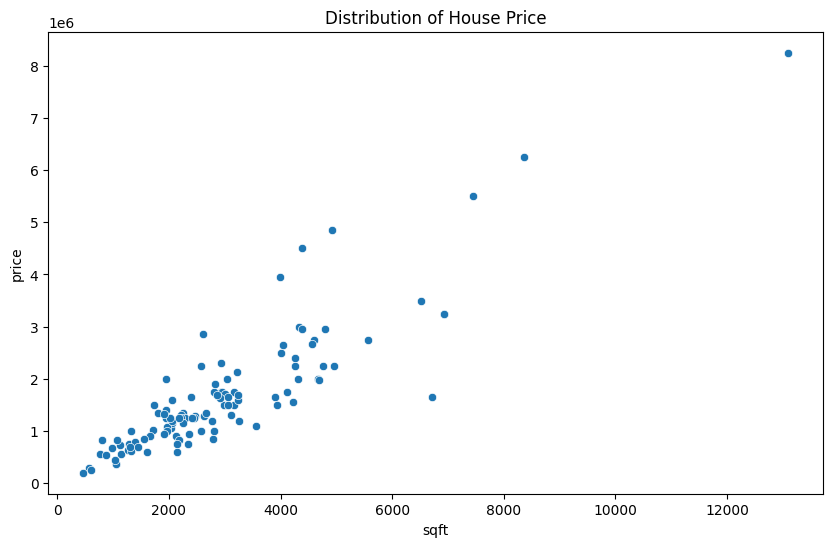

In [37]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.scatterplot(x=final_housing_data['sqft'], y=final_housing_data['price'])
plt.title("Distribution of House Price")

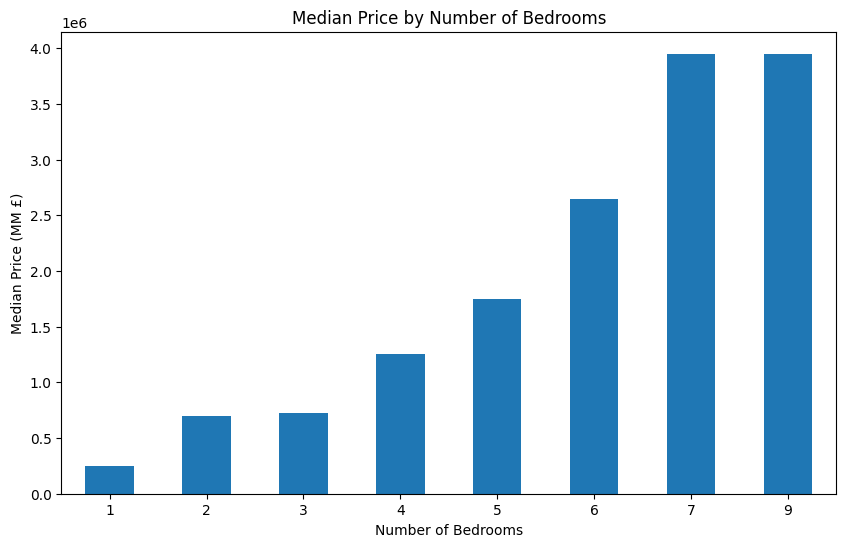

In [38]:
median_prices = final_housing_data.groupby('no_bed')['price'].median()

plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar')
plt.title('Median Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price (MM £)')
plt.xticks(rotation=0)       
#plt.tight_layout()      
plt.show()

### Removing outliers

In [39]:
final_housing_data = final_housing_data.drop(final_housing_data[final_housing_data['no_bed']==9].index)

In [40]:
final_housing_data['price'].describe()

count    1.120000e+02
mean     1.615490e+06
std      1.136848e+06
min      2.000000e+05
25%      8.987500e+05
50%      1.312500e+06
75%      1.980000e+06
max      8.250000e+06
Name: price, dtype: float64

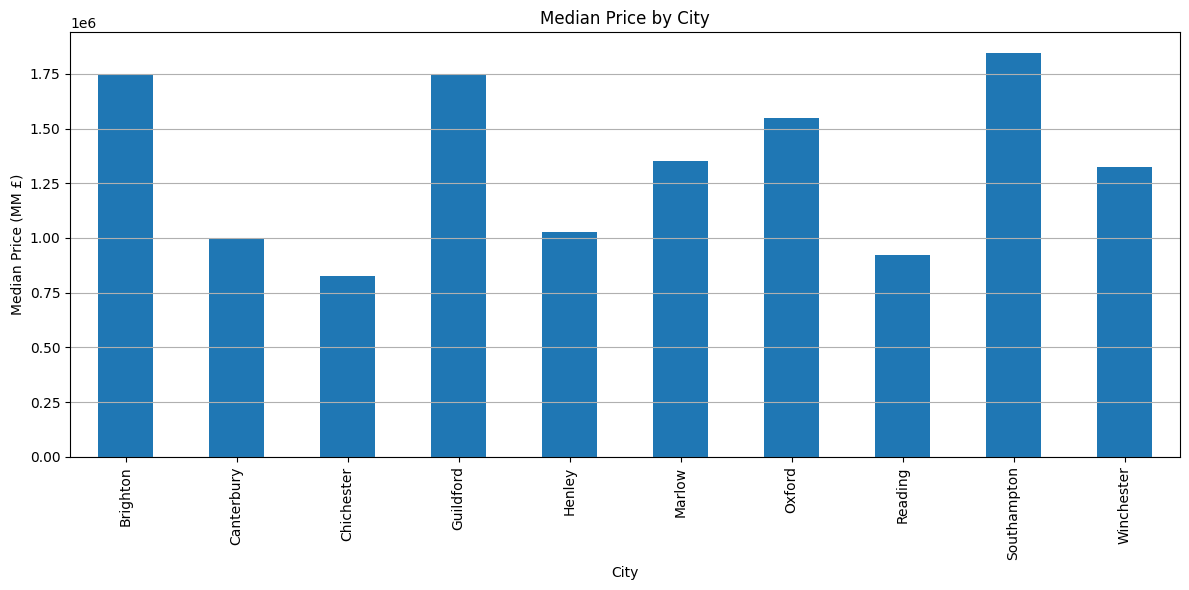

In [41]:
median_prices_by_city = final_housing_data.groupby('City')['price'].median()

plt.figure(figsize=(12, 6))
median_prices_by_city.plot(kind='bar')
plt.title('Median Price by City')
plt.xlabel('City')
plt.ylabel('Median Price (MM £)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')      
plt.tight_layout()      
plt.show()


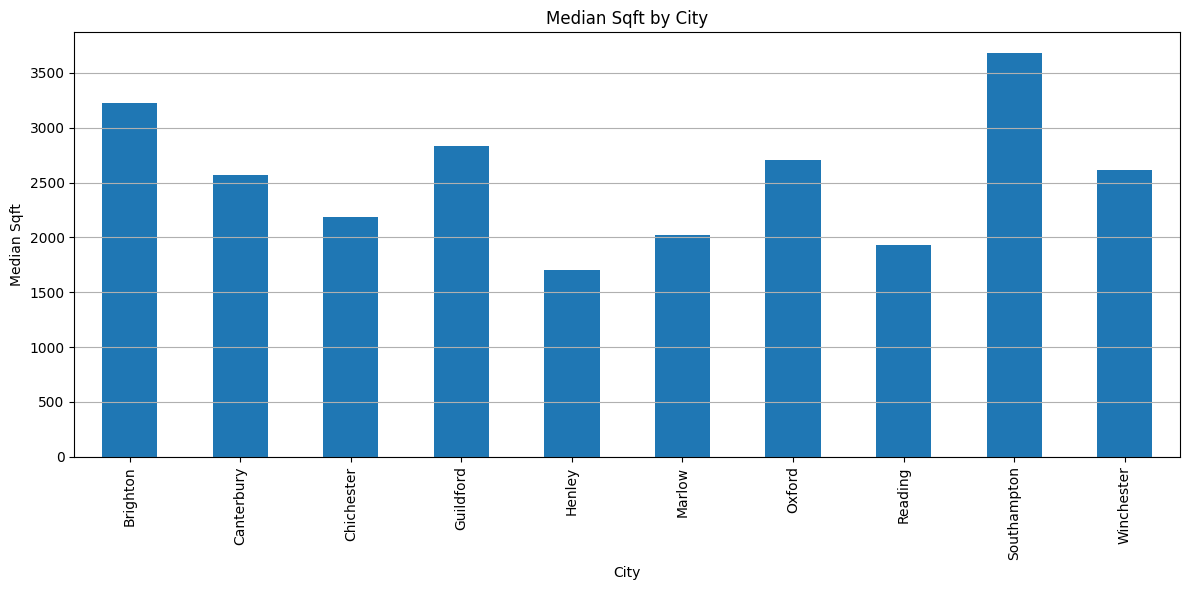

In [42]:
median_sqft_by_city = final_housing_data.groupby('City')['sqft'].median()

plt.figure(figsize=(12, 6))
median_sqft_by_city.plot(kind='bar')
plt.title('Median Sqft by City')
plt.xlabel('City')
plt.ylabel('Median Sqft')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')      
plt.tight_layout()      
plt.show()


In [ ]:
import plotly.express as px
final_housing_data_points = final_housing_data[['prop_lat','prop_lon']]
p = px.scatter_geo(final_housing_data_points, lat = 'prop_lat', lon = 'prop_lon')
p

### Location Validation (color scale 150 == UK)

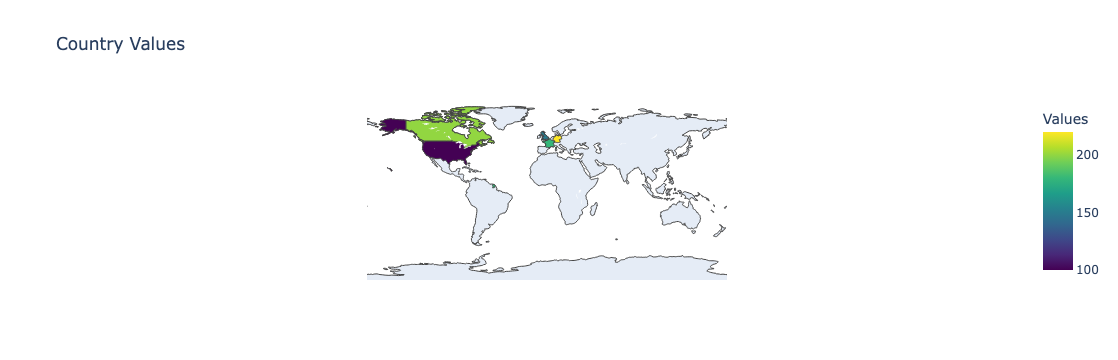

In [44]:
import plotly.graph_objects as go

countries = ['USA', 'Canada', 'UK', 'France', 'Germany']
values = [100, 200, 150, 180, 220]

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=countries,
    z=values,
    locationmode='country names', 
    colorscale='Viridis',
    colorbar_title='Values',
    text=countries,  
    hoverinfo='location+z+text',  
))

fig.update_layout(
    title_text='Country Values',  
    geo=dict(showframe=False) 
)

# Show the plo
fig.show()


In [45]:
final_housing_data['dis_to_cen(miles)'].describe()

count    112.000000
mean       6.021631
std        4.122540
min        0.078011
25%        2.455932
50%        5.063480
75%        8.925112
max       18.800549
Name: dis_to_cen(miles), dtype: float64

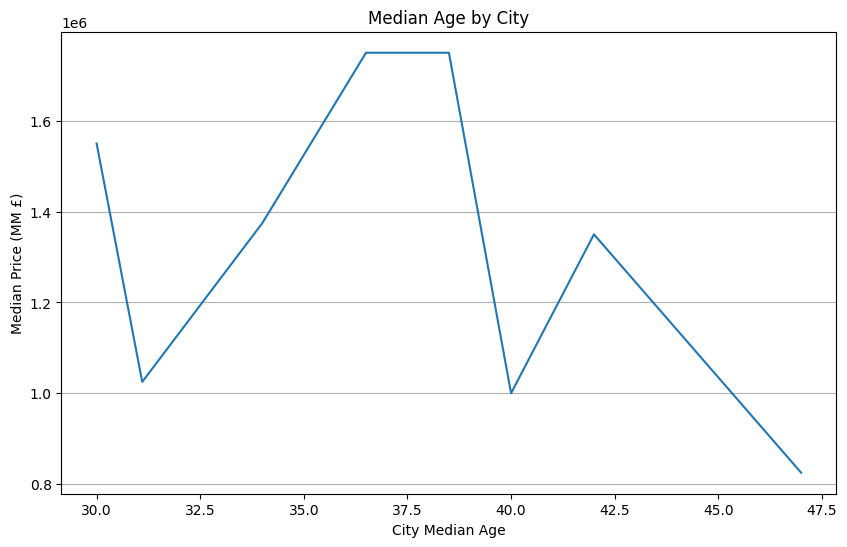

<Figure size 3000x1500 with 0 Axes>

In [46]:
median_age_by_city = final_housing_data.groupby('City_med_age')['price'].median()

plt.figure(figsize=(10, 6))
median_age_by_city.plot(kind='line')
plt.title('Median Age by City')
plt.xlabel('City Median Age')
plt.ylabel('Median Price (MM £)')
#plt.xticks(rotation=90)  
plt.grid(axis='y')      
plt.figure(figsize=(30,15))
plt.tight_layout()      
plt.show()

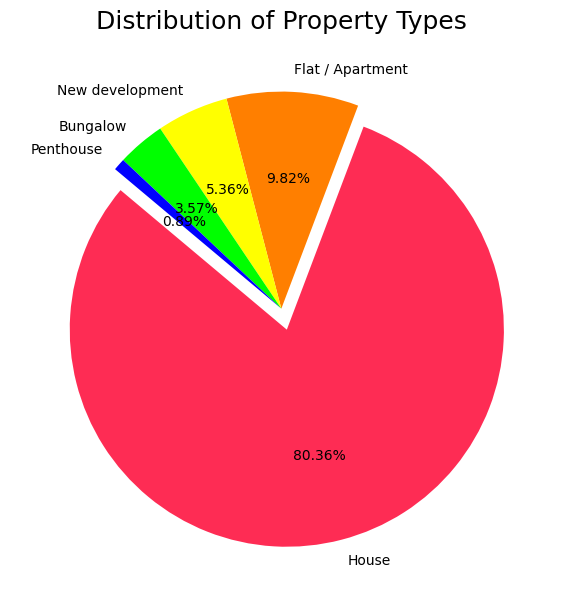

In [47]:
property_type_counts = final_housing_data['property_type'].value_counts()
explode = (0.1, 0, 0, 0, 0) 
colors = ['#fe2c54', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#9400D3']
plt.figure(figsize=(10, 6))
#plt.axis('equal')

pie = property_type_counts.plot(kind='pie', autopct='%1.2f%%', colors=colors, explode=explode, startangle=140)
plt.title('Distribution of Property Types', fontsize=18)
plt.ylabel('') 
plt.tight_layout()
plt.show()


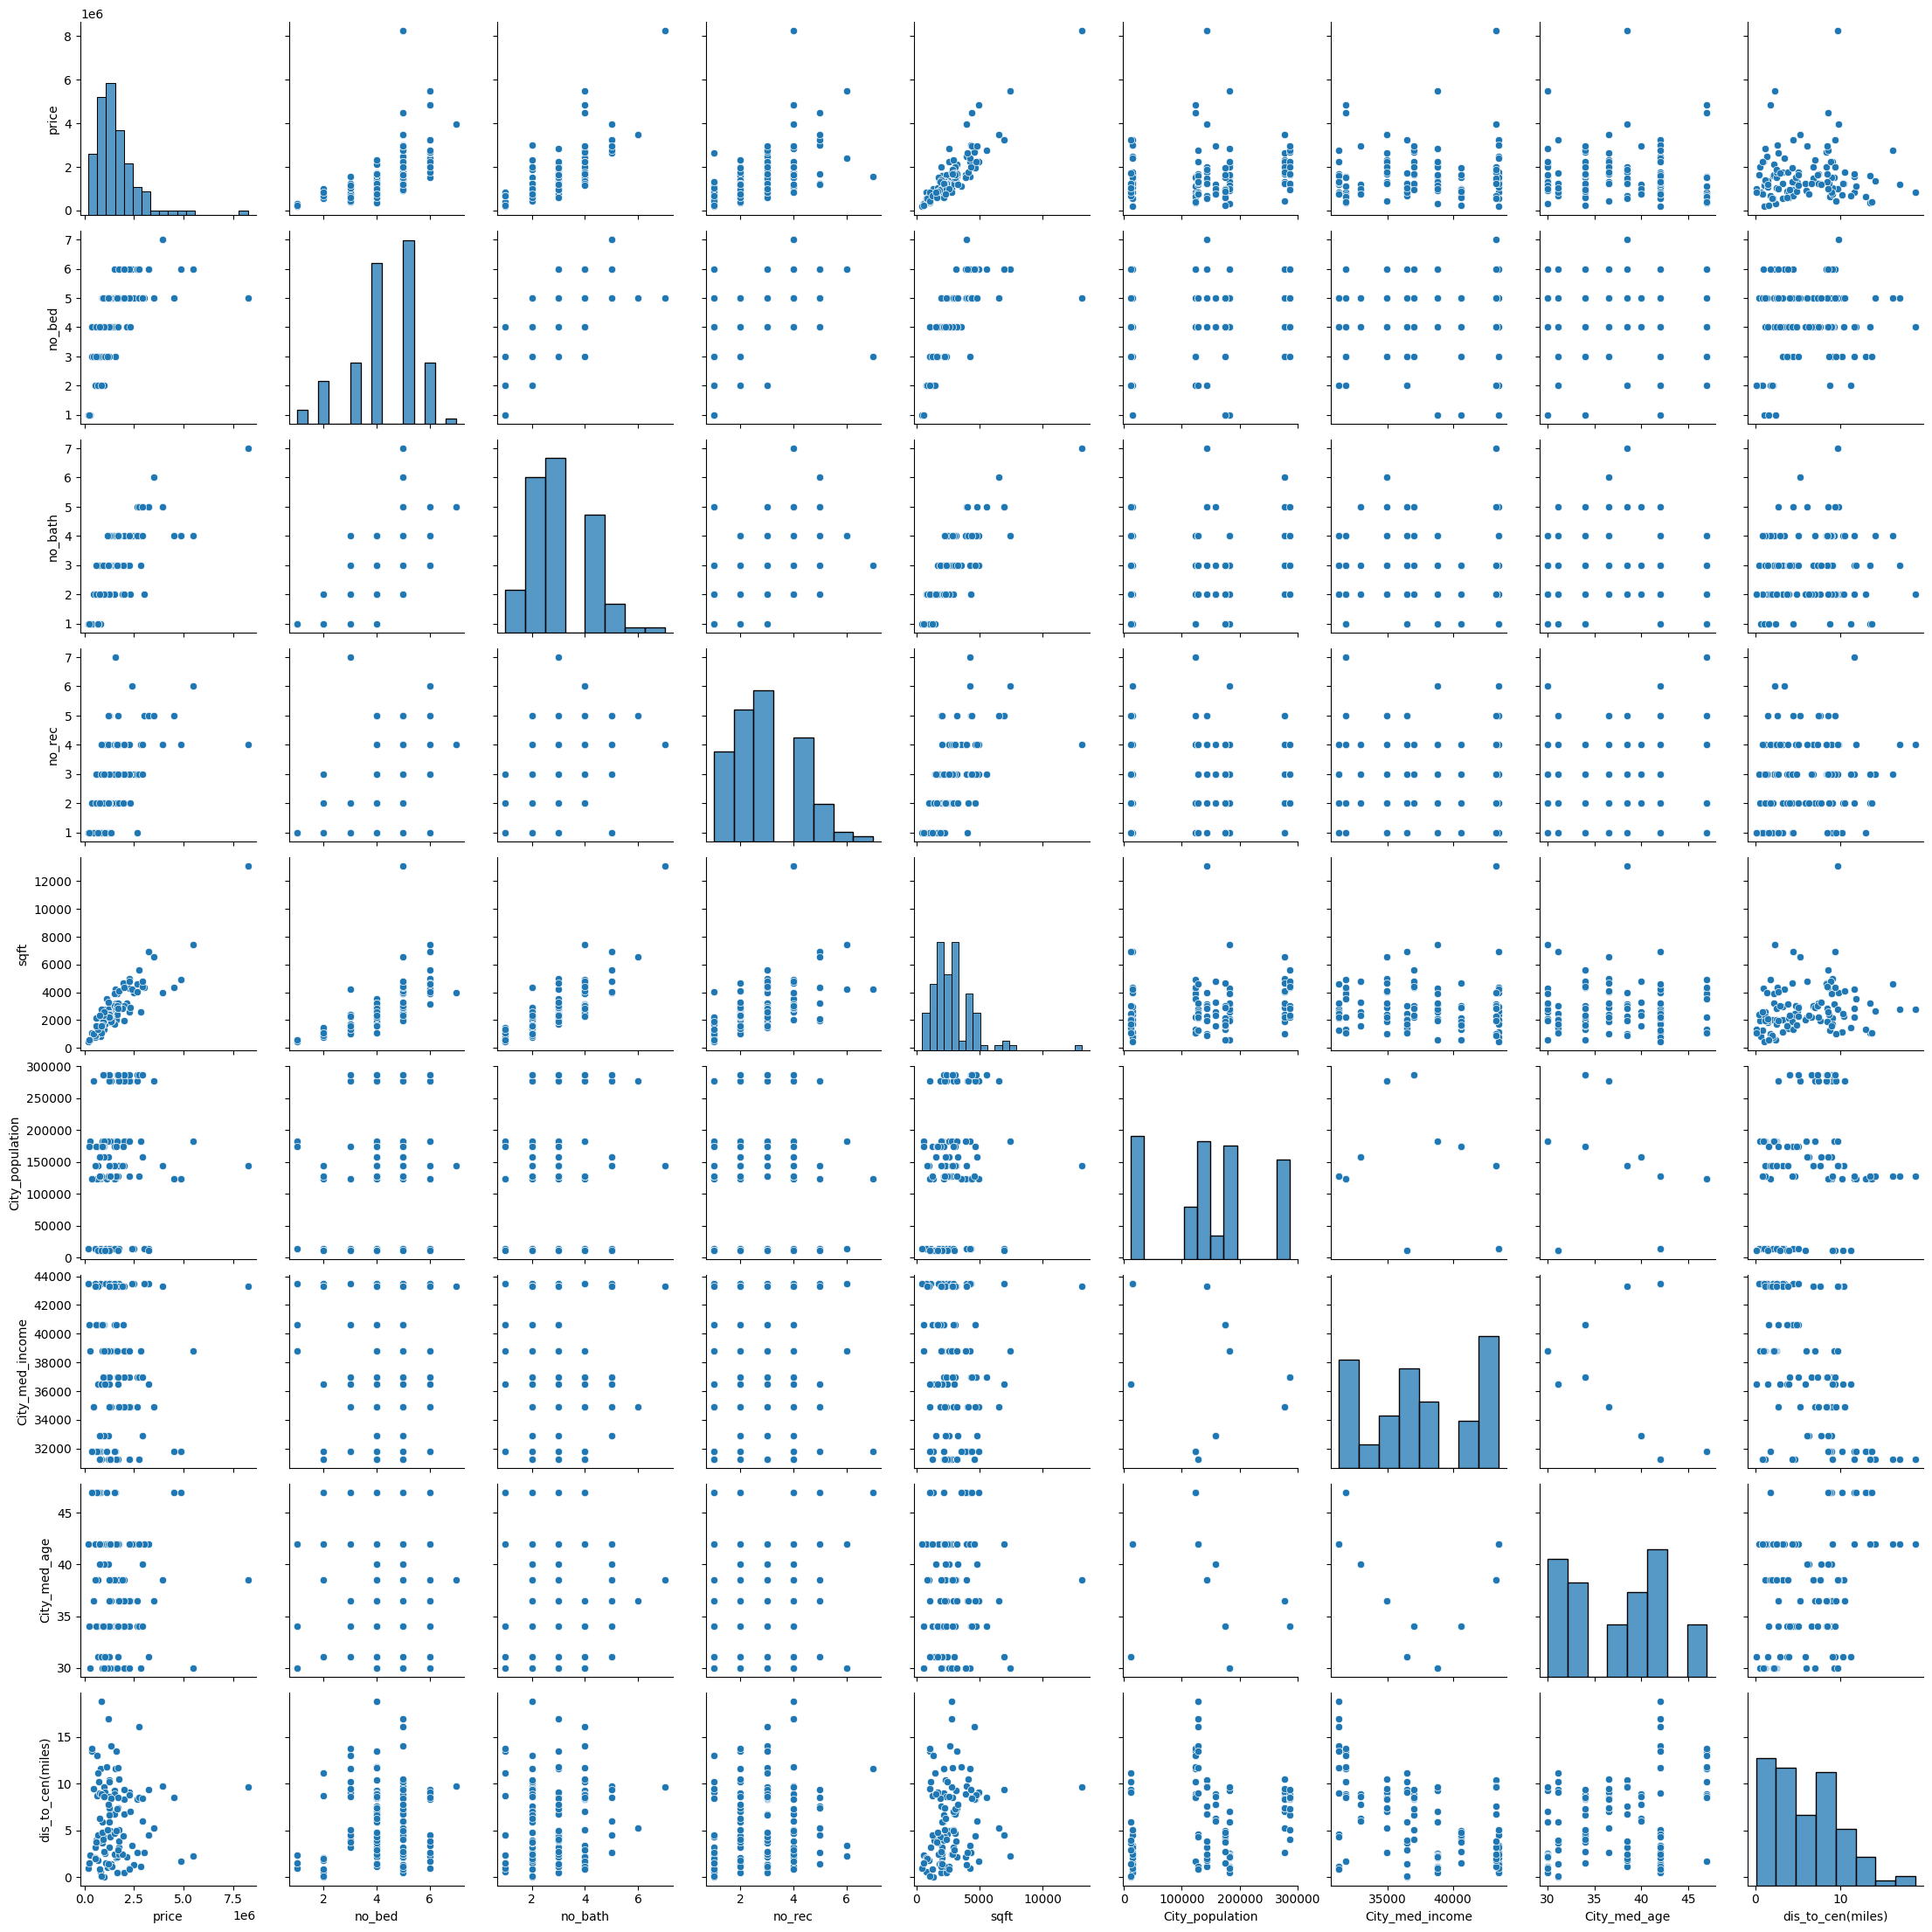

In [48]:
sns.pairplot(final_housing_data, vars=['price', 'no_bed', 'no_bath','no_rec', 'sqft', 'City_population', 'City_med_income', 'City_med_age','dis_to_cen(miles)'])

<Axes: >

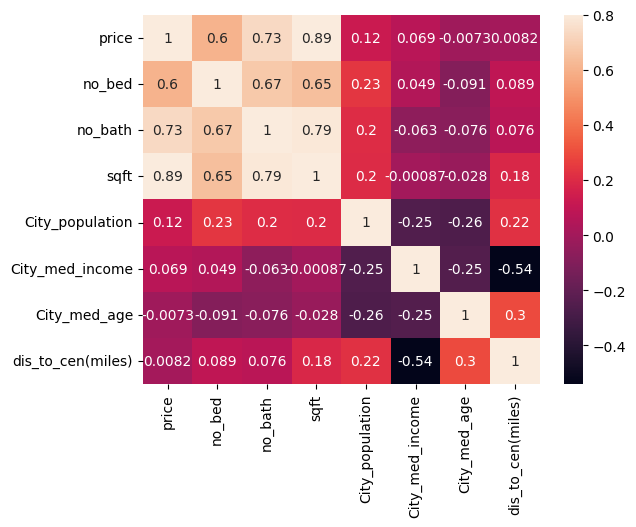

In [49]:
sns.heatmap(final_housing_data[['price', 'no_bed', 'no_bath', 'sqft', 'City_population', 'City_med_income', 'City_med_age','dis_to_cen(miles)']].corr(), vmax=.8, annot=True)

### Exploratory Data Analysis (EDA)